# Package

In [1]:
import pandas as pd

# Importer les données d'entrainement stationnarisées

In [18]:
df_stationary_train = pd.read_csv("df_stationary_train.csv", index_col="date")
df_stationary_test = pd.read_csv("df_stationary_test.csv", index_col="date")

In [19]:
df_stationary_train_origin = df_stationary_train.copy()
df_stationary_test_origin = df_stationary_test.copy()

# Winsorisation

In [20]:
df_stationary_train.columns.tolist()

['UNRATE',
 'TB3MS',
 'RPI',
 'INDPRO',
 'DPCERA3M086SBEA',
 'S&P 500',
 'BUSLOANS',
 'CPIAUCSL',
 'OILPRICEx',
 'M2SL',
 'USREC']

In [21]:
# Niveau de winsorisation (1er et 99e percentiles)
winsor_level = 0.01

In [22]:
# 1️⃣ Sélectionner les variables à winsoriser
features_winsorise = [c for c in df_stationary_train.columns if c not in ["UNRATE", "USREC"]]

In [23]:
# 2️⃣ Calculer les bornes sur TRAIN uniquement
lower_wins = df_stationary_train[features_winsorise].quantile(winsor_level)
upper_wins = df_stationary_train[features_winsorise].quantile(1 - winsor_level)

In [24]:
# 3️⃣ Appliquer les bornes sur TRAIN et TEST
df_stationary_train[features_winsorise] = df_stationary_train[features_winsorise].clip(lower=lower_wins, upper=upper_wins, axis=1)
df_stationary_test[features_winsorise] = df_stationary_test[features_winsorise].clip(lower=lower_wins, upper=upper_wins, axis=1)

In [28]:
# 4️⃣ Vérification rapide
print("\nAvant winsorisation (TRAIN):")
print(df_stationary_train_origin[features_winsorise].describe(percentiles=[0.01, 0.99]).T)


Avant winsorisation (TRAIN):
                 count      mean       std       min        1%       50%  \
TB3MS            360.0  0.028528  1.149890 -8.130000 -4.390700  0.090000   
RPI              360.0  0.009316  0.007655 -0.021149 -0.011443  0.009558   
INDPRO           360.0  0.008371  0.019834 -0.084022 -0.052639  0.009814   
DPCERA3M086SBEA  360.0  0.009182  0.009592 -0.029380 -0.016657  0.009015   
S&P 500          360.0  0.014903  0.071694 -0.296015 -0.200755  0.019855   
BUSLOANS         360.0 -0.000111  0.016990 -0.057920 -0.041372 -0.000079   
CPIAUCSL         360.0  0.000034  0.006034 -0.023800 -0.016642 -0.000079   
OILPRICEx        360.0  0.016028  0.123623 -0.769121 -0.225183  0.000000   
M2SL             360.0  0.000133  0.008115 -0.036937 -0.018044 -0.000234   

                      99%       max  
TB3MS            3.282000  5.220000  
RPI              0.030471  0.036704  
INDPRO           0.047281  0.091980  
DPCERA3M086SBEA  0.032722  0.037792  
S&P 500          0.

In [ ]:
print("\nAprès winsorisation (TRAIN):")
print(df_stationary_train[features_winsorise].describe(percentiles=[0.01, 0.99]).T)


Après winsorisation (TRAIN):
                 count      mean       std       min        1%       50%  \
TB3MS            360.0  0.032014  1.038703 -4.390700 -4.325387  0.090000   
RPI              360.0  0.009303  0.007294 -0.011443 -0.011212  0.009558   
INDPRO           360.0  0.008360  0.018321 -0.052639 -0.050514  0.009814   
DPCERA3M086SBEA  360.0  0.009240  0.009238 -0.016657 -0.015885  0.009015   
S&P 500          360.0  0.015199  0.067595 -0.200755 -0.187163  0.019855   
BUSLOANS         360.0 -0.000093  0.016620 -0.041372 -0.041079 -0.000079   
CPIAUCSL         360.0  0.000019  0.005795 -0.016642 -0.016574 -0.000079   
OILPRICEx        360.0  0.016000  0.083200 -0.225183 -0.213951  0.000000   
M2SL             360.0  0.000142  0.007428 -0.018044 -0.017882 -0.000234   

                      99%       max  
TB3MS            3.233620  3.282000  
RPI              0.028593  0.030471  
INDPRO           0.046355  0.047281  
DPCERA3M086SBEA  0.032602  0.032722  
S&P 500          0.

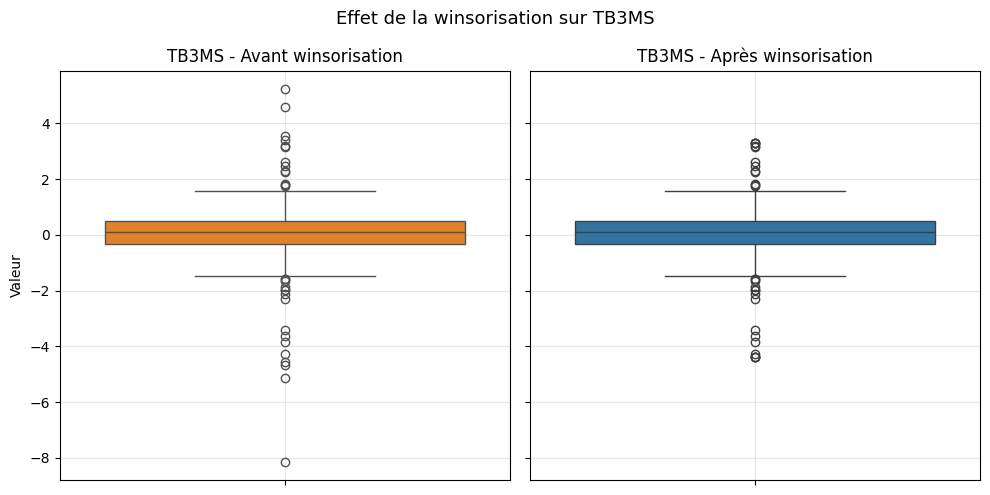

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variable à comparer
var = "TB3MS"

# Données avant/après
before = df_stationary_train_origin[var]
after = df_stationary_train[var]

# Créer les deux axes côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Boxplot avant winsorisation
sns.boxplot(y=before, color="#ff7f0e", ax=ax1)
ax1.set_title(f"{var} - Avant winsorisation")
ax1.set_ylabel("Valeur")
ax1.grid(alpha=0.3)

# Boxplot après winsorisation
sns.boxplot(y=after, color="#1f77b4", ax=ax2)
ax2.set_title(f"{var} - Après winsorisation")
ax2.set_ylabel("")
ax2.grid(alpha=0.3)

# Ajuster les marges
plt.suptitle(f"Effet de la winsorisation sur {var}", fontsize=13)
plt.tight_layout()
plt.show()

On voit clairement que le winsorisation a marché pour la variable TBMS. Au lieu d'avoir des valeurs dépassant 4 et -4.5, actuellement ce n'est plus le cas. Dans les autres variables, le changement aussi a bien fonctionné.

# Normalisation

In [35]:
df_stationary_train_normalized = df_stationary_train.apply(lambda col : ((col - col.mean()) / col.std()))
df_stationary_test_normalized = df_stationary_test.apply(lambda col : ((col - col.mean()) / col.std()))

In [36]:
df_stationary_train_normalized.describe().round(4)

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL,USREC
count,360.0000,360.0000,360.0000,360.0000,360.0000,360.0000,360.0000,360.0000,360.0000,360.0000,360.0000
mean,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.5800,-4.2579,-2.8444,-3.3295,-2.8033,-3.1948,-2.4837,-2.8750,-2.8988,-2.4484,-0.4643
25%,-0.6184,-0.3485,-0.5399,-0.4567,-0.5918,-0.6012,-0.6129,-0.5456,-0.1923,-0.6490,-0.4643
50%,-0.1726,0.0558,0.0349,0.0794,-0.0244,0.0689,0.0008,-0.0169,-0.1923,-0.0506,-0.4643
75%,0.3623,0.4433,0.6322,0.6180,0.6693,0.6642,0.6449,0.7131,0.0118,0.5886,-0.4643
max,3.4830,3.1289,2.9023,2.1244,2.5419,2.1139,2.5753,2.5210,4.4834,2.6915,2.1476


La moyenne est égale à 0 et l'écart-type à 1 pour toutes les variables. Ce qui veut dire qu'elles sont centrées et réduites. 

# Exporter les données

In [37]:
df_stationary_train_normalized.to_csv("df_stationary_normalized_train.csv")
df_stationary_test_normalized.to_csv("df_stationary_normalized_test.csv")